<a href="https://colab.research.google.com/github/AlifiyulAkyun/PCVK_Genap_2023/blob/main/uts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*  Nama : Alifiyul Akyun
*  No : 04
*  Kelas : TI-3B
*  NIM : 2041720036


In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [84]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

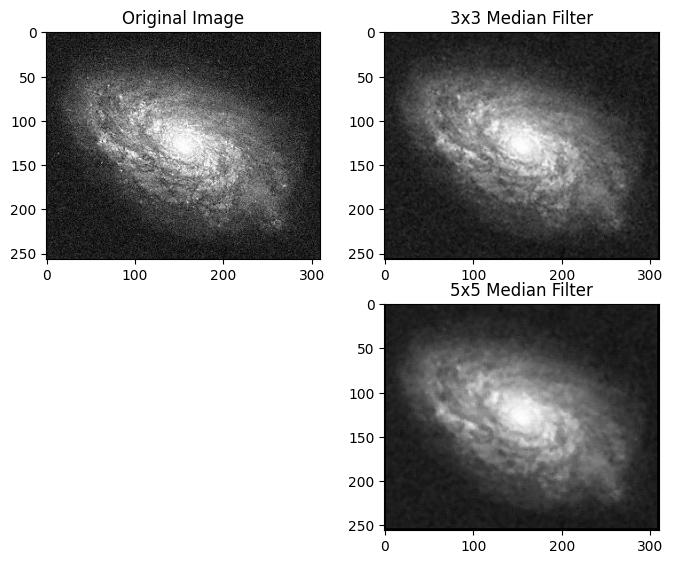

In [89]:
def MedianFilter(image, filter_size):
    # create an empty array with same size as input image
    output = np.zeros(image.shape, np.uint8)

    # create the kernel array of filter as same size as filter_size
    filter_array = [image[0][0]] * filter_size

    # deal with filter size = 3x3
    if filter_size == 9:
        for j in range(1, image.shape[0]-1):
            for i in range(1, image.shape[1]-1):
                filter_array[0] = image[j-1, i-1]
                filter_array[1] = image[j, i-1]
                filter_array[2] = image[j+1, i-1]
                filter_array[3] = image[j-1, i]
                filter_array[4] = image[j, i]
                filter_array[5] = image[j+1, i]
                filter_array[6] = image[j-1, i+1]
                filter_array[7] = image[j, i+1]
                filter_array[8] = image[j+1, i+1]

                # sort the array
                filter_array.sort()

                # put the median number into output array
                output[j][i] = filter_array[4]

    # deal with filter size = 5x5
    elif filter_size == 25:
        for j in range(2, image.shape[0]-2):
            for i in range(2, image.shape[1]-2):
                filter_array[0] = image[j-2, i-2]
                filter_array[1] = image[j-1, i-2]
                filter_array[2] = image[j, i-2]
                filter_array[3] = image[j+1, i-2]
                filter_array[4] = image[j+2, i-2]
                filter_array[5] = image[j-2, i-1]
                filter_array[6] = image[j-1, i-1]
                filter_array[7] = image[j, i-1]
                filter_array[8] = image[j+1, i-1]
                filter_array[9] = image[j+2, i-1]
                filter_array[10] = image[j-2, i]
                filter_array[11] = image[j-1, i]
                filter_array[12] = image[j, i]
                filter_array[13] = image[j+1, i]
                filter_array[14] = image[j+2, i]
                filter_array[15] = image[j-2, i+1]
                filter_array[16] = image[j-1, i+1]
                filter_array[17] = image[j, i+1]
                filter_array[18] = image[j+1, i+1]
                filter_array[19] = image[j+2, i+1]
                filter_array[20] = image[j-2, i+2]
                filter_array[21] = image[j-1, i+2]
                filter_array[22] = image[j, i+2]
                filter_array[23] = image[j+1, i+2]
                filter_array[24] = image[j+2, i+2]

                # sort the array
                filter_array.sort()

                # put the median number into output array
                output[j][i] = filter_array[12]
    return output


def main():
    # read image
    gray_galaxy = cv2.imread('/content/drive/MyDrive/PCVK/image/noises-20230223T140529Z-001/noises/1.jpg', 0)

  
    # use 3x3 median filter
    median_3x3_galaxy = MedianFilter(gray_galaxy, 9)


    # use 5x5 median filter
    median_5x5_galaxy = MedianFilter(gray_galaxy, 25)

    # set up side-by-side image display
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(8)

    # display the oringinal image
    fig.add_subplot(3, 2, 1)
    plt.title('Original Image')
    plt.imshow(gray_galaxy, cmap='gray')
 
    # display 3x3 median filter
    fig.add_subplot(3, 2, 2)
    plt.title('3x3 Median Filter')
    plt.imshow(median_3x3_galaxy, cmap='gray')

    # display 5x5 median filter
    fig.add_subplot(3, 2, 4)
    plt.title('5x5 Median Filter')
    plt.imshow(median_5x5_galaxy, cmap='gray')

    plt.show()


if __name__ == "__main__":
    main()

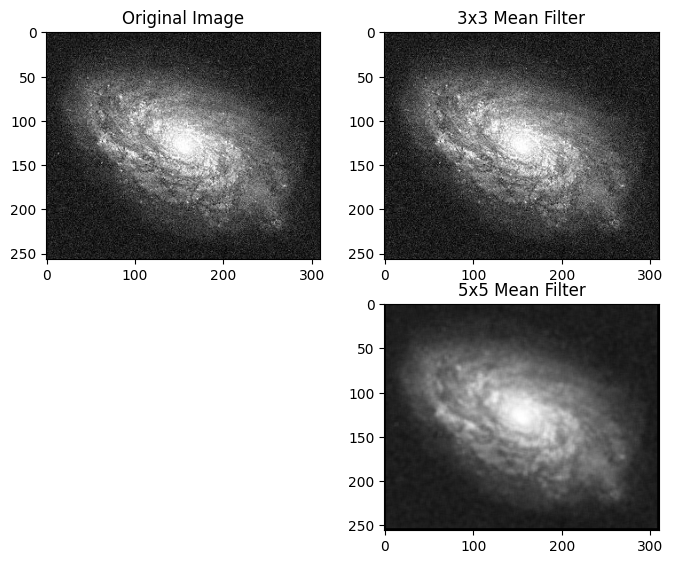

In [93]:
def MeanFilter(image, filter_size):
    # create an empty array with same size as input image
    output = np.zeros(image.shape, np.uint8)

    # creat an empty variable
    result = 0

    # deal with filter size = 3x3
    if filter_size == 9:
        for j in range(1, image.shape[0]-1):
            for i in range(1, image.shape[1]-1):
                for y in range(-1, 2):
                    for x in range(-1, 2):
                        result = result + image[j+y, i+x]
                output[j][i] = int(result / filter_size)
                result = 0

    # deal with filter size = 5x5
    elif filter_size == 25:
        for j in range(2, image.shape[0]-2):
            for i in range(2, image.shape[1]-2):
                for y in range(-2, 3):
                    for x in range(-2, 3):
                        result = result + image[j+y, i+x]
                output[j][i] = int(result / filter_size)
                result = 0
        return output


def main():
    # read image
    gray_galaxy = cv2.imread('/content/drive/MyDrive/PCVK/image/noises-20230223T140529Z-001/noises/1.jpg', 0)
    # use 3x3 mean filter
    mean_3x3 = MeanFilter(gray_galaxy, 9)


    # use 5x5 mean filter
    mean_5x5_galaxy = MeanFilter(gray_galaxy, 25)
     # set up side-by-side image display
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(8)

    # display the oringinal image
    fig.add_subplot(3, 2, 1)
    plt.title('Original Image')
    plt.imshow(gray_galaxy, cmap='gray')

 

    # display 3x3 mean filter
    fig.add_subplot(3, 2, 2)
    plt.title('3x3 Mean Filter')
    plt.imshow(gray_galaxy, cmap='gray')



    # display 5x5 mean filter
    fig.add_subplot(3, 2, 4)
    plt.title('5x5 Mean Filter')
    plt.imshow(mean_5x5_galaxy, cmap='gray')



    plt.show()


if __name__ == "__main__":
    main()